Data Mining Lab Project by Mokshita Yadav

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from typing import Tuple

# Reading training data from .csv file
train_data = pd.read_csv('train.csv')


# Basic Analysis
print("\n~~Trian Head~~\n")
print(train_data.head())

print("\n~~Train info~~\n")
print(train_data.info())

print("\n~~Train describe~~\n")
print(train_data.describe())

# Nan values
print("\n~~Train isnull.sum~~\n")
print(train_data.isnull().sum())


~~Trian Head~~

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   


In [7]:
# Read test data from .csv file
test_data = pd.read_csv('test.csv')

# Basic Analysis

print("\n~~Test Head~~\n")
print(test_data.head())

print("\n~~Test info~~\n")
print(test_data.info())

print("\n~~Test describe~~\n")
print(test_data.describe())

# Nan values
print("\n~~Test isnull.sum~~\n")
print(test_data.isnull().sum())


~~Test Head~~

   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2      

In [8]:
# Statistics of categorical variables
print("\n~~Gender.value_counts~~\n")
print(train_data['Gender'].value_counts())

print("\n~~satisfaction.value_counts~~\n")
print(train_data['satisfaction'].value_counts())

print("\n~~Customer Type.value_counts~~\n")
print(train_data['Customer Type'].value_counts())

print("\n~~Class.value_counts~~\n")
print(train_data['Class'].value_counts())

print("\n~~Type of Travel.value_counts~~\n")
print(train_data['Type of Travel'].value_counts())



~~Gender.value_counts~~

Gender
Female    52727
Male      51177
Name: count, dtype: int64

~~satisfaction.value_counts~~

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

~~Customer Type.value_counts~~

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

~~Class.value_counts~~

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

~~Type of Travel.value_counts~~

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64


In [9]:
#Consistent Data Formats

In [10]:
# Convert the "Customer Type" variable
train_data['Customer Type'] = train_data['Customer Type'].str.lower()
test_data['Customer Type'] = test_data['Customer Type'].str.lower()

# Convert the "Type of Travel" variable
train_data['Type of Travel'] = train_data['Type of Travel'].str.lower()
test_data['Type of Travel'] = test_data['Type of Travel'].str.lower()

In [11]:
#Data Cleaning and Transformation

In [12]:
# Transformation function of the categorical variable "satisfaction"
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1

#------------------------------------------------------------------------

# Transformation function of the categorical variable "Gender"
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1

#------------------------------------------------------------------------
# Transformation function of the categorical variable "Customer Type"
def transform_customer_type(x):
    if x == 'loyal customer':
        return 1
    elif x == 'disloyal customer':
        return 0
    else:
        return -1
    
#------------------------------------------------------------------------

# Transformation function of the categorical variable "Class"
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0
    else:
        return -1

#------------------------------------------------------------------------
# Transformation function of the categorical variable "Type of Travel"
def transform_type_of_travel(x):
    if x == 'business travel':
        return 1
    elif x == 'personal travel':
        return 0
    else:
        return -1

#------------------------------------------------------------------------

In [13]:
#Explanation of Functions

In [14]:
# Function process_data(df):
def preprocess_data(df):
    df = df.drop(['Unnamed: 0', 'id'], axis=1) # Remove unnecessary columns
    df['Gender'] = df['Gender'].apply(transform_gender) # Convert categorical variables
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type) # Convert categorical variables
    df['Type of Travel'] = df['Type of Travel'].apply(transform_type_of_travel) # Convert categorical variables
    df['Class'] = df['Class'].apply(transform_class) # Convert categorical variables
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction) # Convert the target variable
    df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median()) # Handling missing values
    
    return df # Return the processed DataFrame


In [15]:
# Transform data
train_processed = preprocess_data(train_data) # This line applies the `preprocess_data()` function to the training data set `train`.
test_processed = preprocess_data(test_data) # This line performs the same process for the estimate data (`test`).


Absolute frequencies of each class:
satisfaction
Unsatisfied    58879
Satisfied      45025
Name: count, dtype: int64

Percentages of each class:
satisfaction
Unsatisfied    56.67
Satisfied      43.33
Name: count, dtype: float64


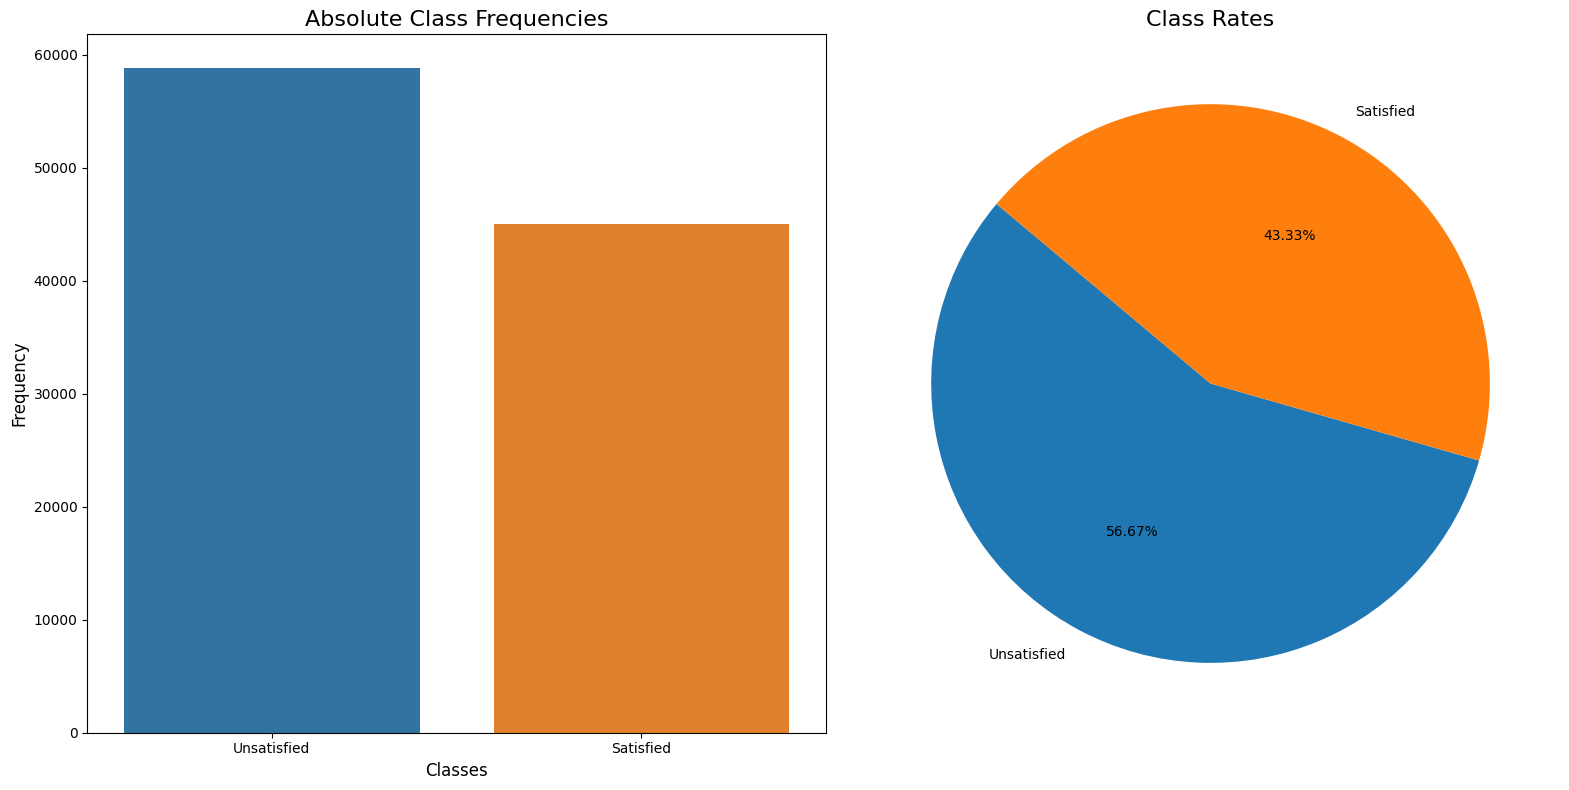

In [16]:
# Calculation of frequencies for the target variable "satisfaction"
class_counts = train_processed['satisfaction'].value_counts()
class_counts.index = class_counts.index.map({1: 'Satisfied', 0: 'Unsatisfied'})

# Show absolute and percentage values
print("Absolute frequencies of each class:")
print(class_counts)

print("\nPercentages of each class:")
print(round((class_counts / len(train_processed) * 100), 2))

# Create the figure and the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot - absolute values
sns.barplot(ax=axes[0], x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="tab10", legend=False)
axes[0].set_title("Absolute Class Frequencies", fontsize=16)
axes[0].set_xlabel("Classes", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Pie chart - percentage values
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.2f%%', startangle=140, colors=sns.color_palette("tab10"))
axes[1].set_title("Class Rates", fontsize=16)


plt.tight_layout()
plt.show()


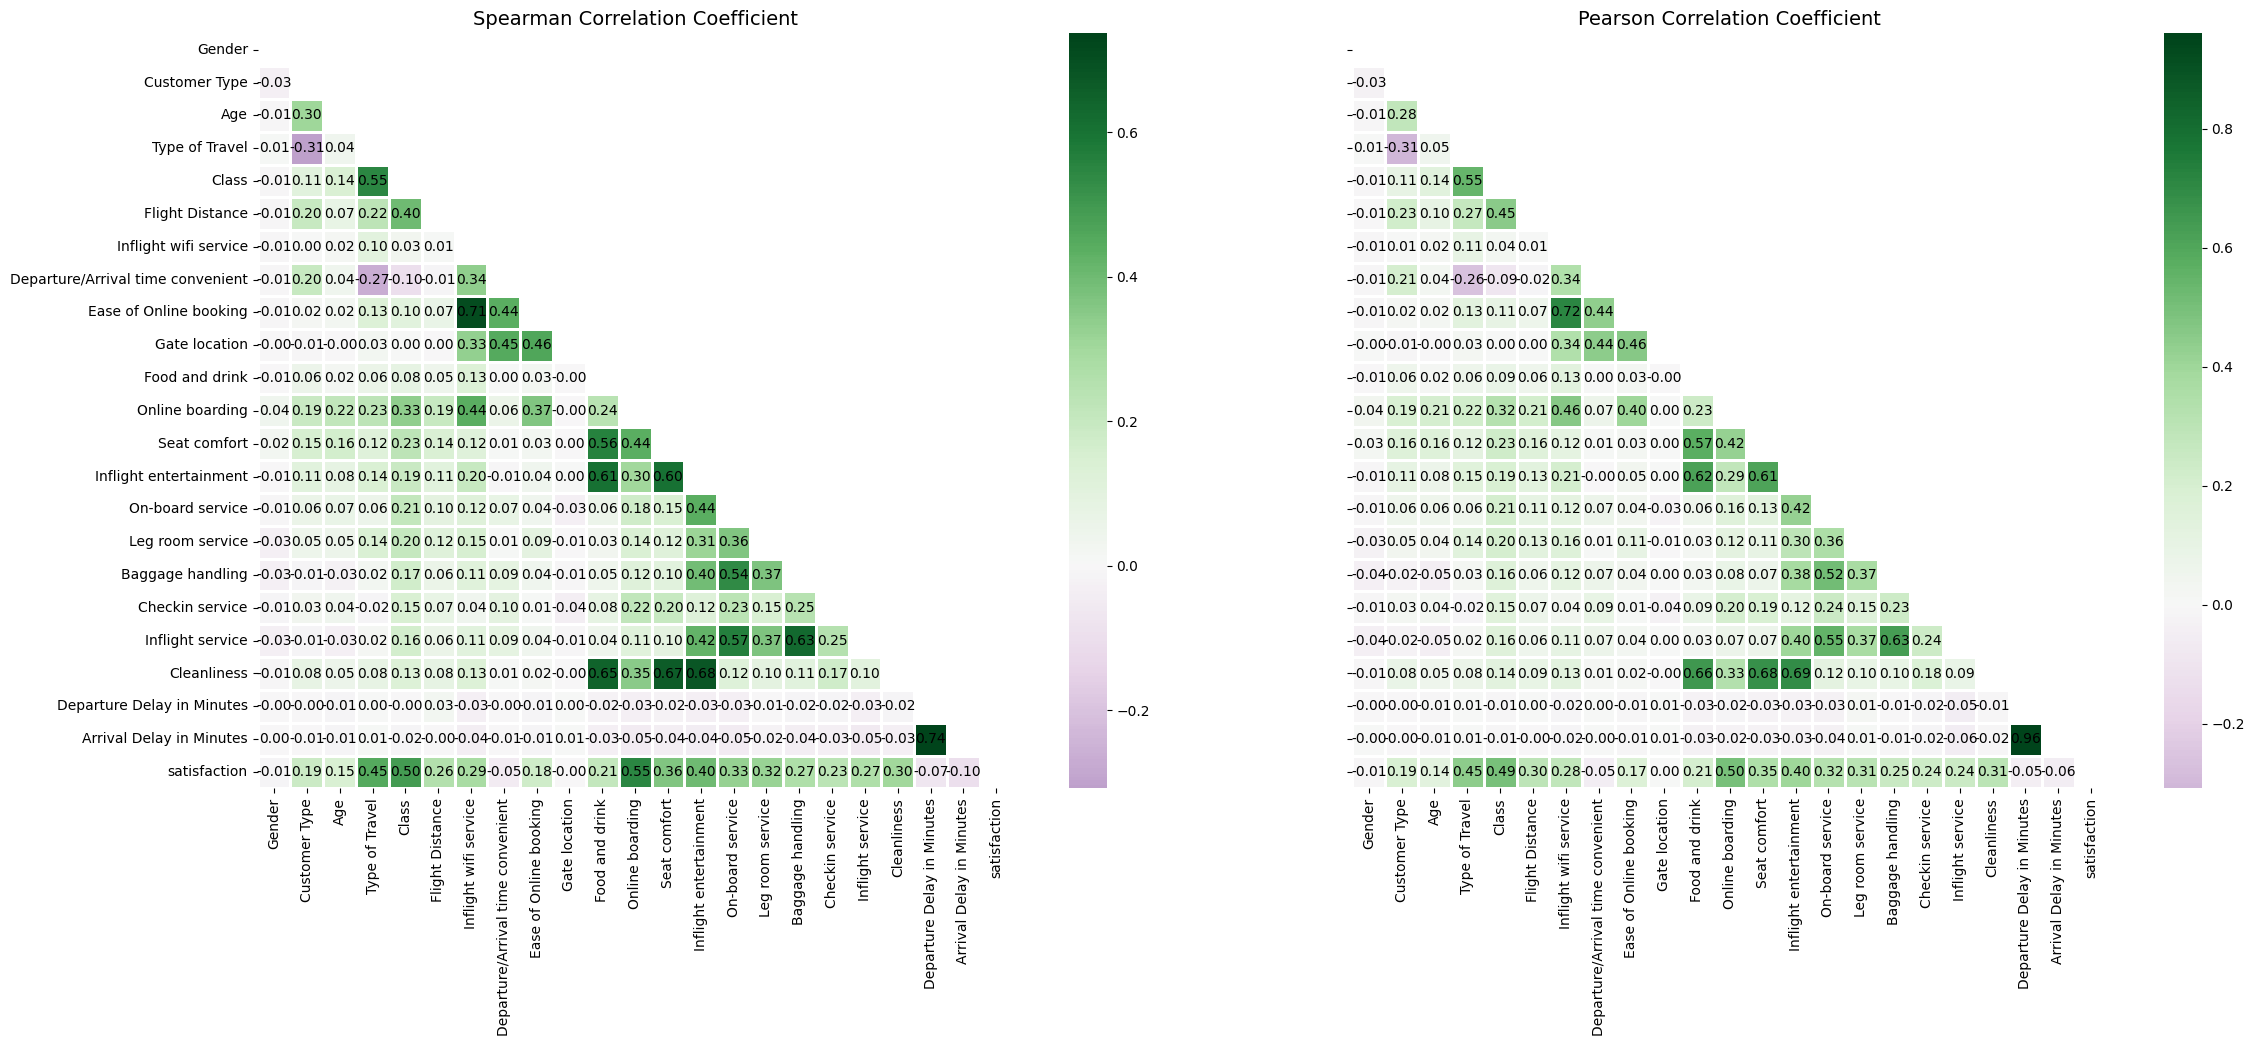

In [17]:
# Calculate correlations
# Pearson correlation coefficient
corr_pearson = train_processed.corr(method='pearson')
# Spearman correlation coefficient
corr_spearman = train_processed.corr(method='spearman')

# GRAPHS:
# Create a mask for the upper triangular part
# The mask hides the upper triangular part of the table for more efficient visualization. 
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Create signatures (subplots)
fig, axes = plt.subplots(1, 2, figsize=(25, 10), sharey=True)  # 1 γραμμή, 2 στήλες


# Heatmap Spearman
sns.heatmap(corr_spearman, annot=True, annot_kws={"size": 10, "color": "black"}, mask=mask, cmap='PRGn', center=0,
            square=True, linewidths=.8, ax=axes[0], fmt=".2f")
axes[0].set_title("Spearman Correlation Coefficient", fontsize=14)

# Heatmap Pearson
sns.heatmap(corr_pearson, annot=True, annot_kws={"size": 10, "color": "black"}, mask=mask, cmap='PRGn', center=0,
            square=True, linewidths=.8, ax=axes[1], fmt=".2f")
axes[1].set_title("Pearson Correlation Coefficient", fontsize=14)

plt.tight_layout()
plt.show()


In [18]:
def prepare_data(train_processed: pd.DataFrame, 
                test_processed: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, list]:
    """
    Prepare data for model training by separating features and target,
    scaling features, and preparing class labels.
    
    Args:
        train_processed: Processed training dataset
        test_processed: Processed test dataset
    
    Returns:
        Tuple containing:
        - X_train_scaled: Scaled training features
        - X_test_scaled: Scaled testing features
        - y_train: Training target values
        - y_test: Testing target values
        - class_labels: Unique class labels
    """
    # Separate features and target
    X_train = train_processed.drop('satisfaction', axis=1)
    y_train = train_processed['satisfaction']
    
    X_test = test_processed.drop('satisfaction', axis=1)
    y_test = test_processed['satisfaction']
    
    # Create class labels
    y = y_train.map({0: 'neutral or dissatisfied', 1: 'satisfied'})
    class_labels = y.unique()
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, class_labels

In [19]:
# Use the function
X_train_scaled, X_test_scaled, y_train, y_test, class_labels = prepare_data(train_processed, test_processed)

In [20]:
#Prediction
#1. Gaussian Naive Bayes (GNB)

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("test.csv")

# Encode all categorical columns
df_encoded = df.copy()
label_encoders = {}

# Check the first few rows to confirm column names
print(df.head())
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

# Handle missing values by filling them with the mean (for numerical data)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Features and target
X = df_imputed.iloc[:, :-1]  # all except last column
y = df_imputed.iloc[:, -1]   # last column as target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Load your dataset
df = pd.read_csv('test.csv')

# Drop rows with all missing values (if any)
df.dropna(how='all', inplace=True)

# Fill numerical and categorical missing values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Set the correct target column (adjust if needed)
target_column = 'satisfaction_satisfied'
X = df.drop(columns=[target_column])
y = df[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define class labels
class_labels = ['Neutral or Dissatisfied', 'Satisfied']

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# ---- Random Sample Prediction ---- #
np.random.seed(25)  # Reproducibility

# Get min/max per feature from training set
feature_min = X_train_scaled.min(axis=0)
feature_max = X_train_scaled.max(axis=0)

# Generate a random sample with values ​​from the attribute value range
np.random.seed(25)  # Set seed for reproducibility
feature_min = X_train.min(axis=0)
feature_max = X_train.max(axis=0)
random_sample = np.random.uniform(feature_min, feature_max, size=(1, X_train.shape[1]))

# Convert random sample to DataFrame to keep feature names
random_sample_df = pd.DataFrame(random_sample, columns=X_train.columns)

# Scale using the same scaler
random_sample_scaled = scaler.transform(random_sample_df)

# Predict with Gaussian Naive Bayes
predicted_class = gnb.predict(random_sample_scaled)

# Fix: Cast prediction to int before indexing
predicted_class_label = class_labels[int(predicted_class[0])]

print(f"\n\tThe forecast for the new sample: {predicted_class_label}\n")




	The forecast for the new sample: Neutral or Dissatisfied



Accuracy: 0.79
ROC_AUC: 0.79

	Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.78      0.81      4411
        True       0.74      0.80      0.77      3382

    accuracy                           0.79      7793
   macro avg       0.79      0.79      0.79      7793
weighted avg       0.79      0.79      0.79      7793



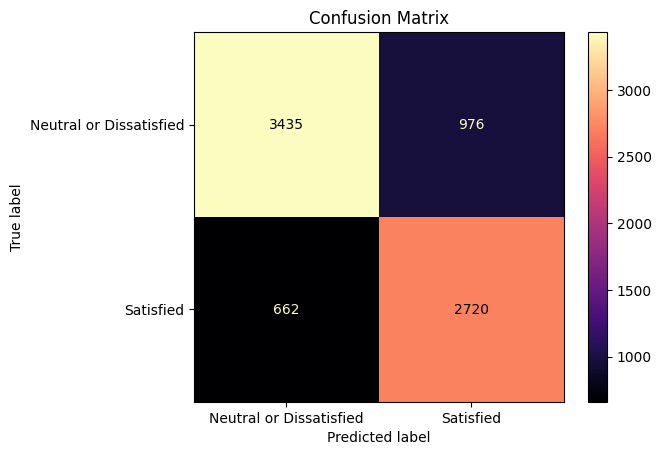

In [23]:
# Estimation and evaluation of the model
accuracy_gnb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_gnb:.2f}")

roc_auc_gnb = roc_auc_score(y_test, y_pred)
print(f"ROC_AUC: {roc_auc_gnb:.2f}")

# Print detailed classification report
print("\n\tClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization 1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap='magma')
plt.title("Confusion Matrix")
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("test.csv")

# Drop irrelevant columns
df = df.drop(columns=["Unnamed: 0", "id"])

# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Fill missing values (Updated to avoid FutureWarning)
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Encode categorical columns
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Separate features and target
X = df.drop(columns=["satisfaction"])
y = df["satisfaction"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Compute mean variances
mean_variances = np.mean(gnb.var_, axis=0)

# Check alignment
assert len(X_train.columns) == len(mean_variances)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean Variance': mean_variances
}).sort_values('Mean Variance', ascending=True)

# Display results
print("\n Feature importance (based on mean variance across classes):")
print(feature_importance)


 Feature importance (based on mean variance across classes):
                              Feature  Mean Variance
1                       Customer Type       0.140963
3                      Type of Travel       0.158833
0                              Gender       0.250942
4                               Class       0.309804
16                   Baggage handling       1.284475
18                   Inflight service       1.302845
11                    Online boarding       1.395629
14                   On-board service       1.449764
13             Inflight entertainment       1.466774
17                    Checkin service       1.494138
12                       Seat comfort       1.506587
19                        Cleanliness       1.537222
15                   Leg room service       1.553679
10                     Food and drink       1.664561
9                       Gate location       1.671738
6               Inflight wifi service       1.742724
8              Ease of Online booking

In [25]:
##2. Logistic Regression

Accuracy: 0.87
ROC AUC: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2251
           1       0.88      0.89      0.88      2945

    accuracy                           0.87      5196
   macro avg       0.87      0.86      0.87      5196
weighted avg       0.87      0.87      0.87      5196



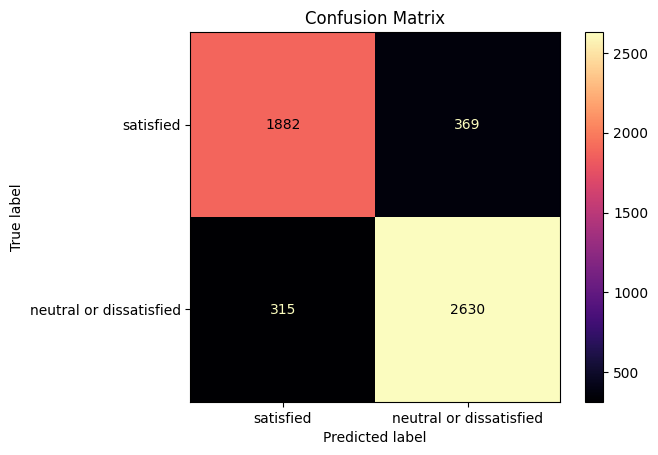

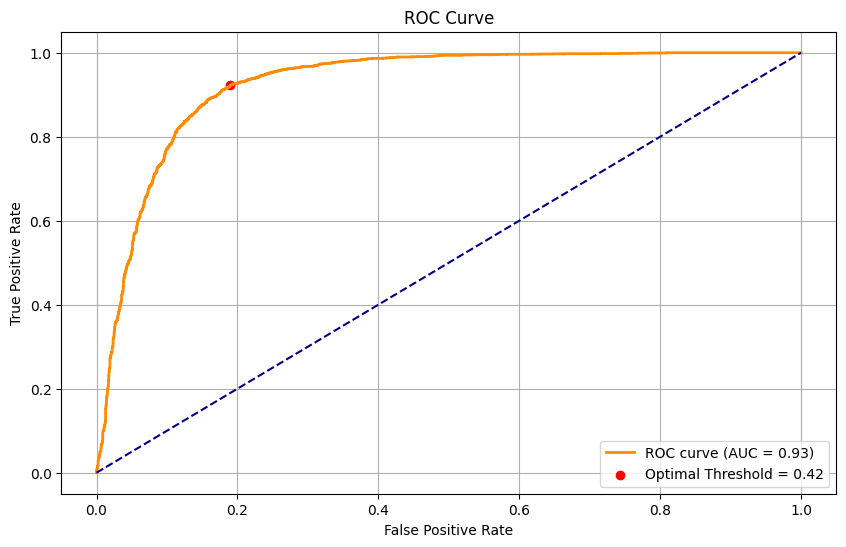


Feature Importance (Logistic Regression Coefficients):
                              Feature  Coefficient
22     Type of Travel_Personal Travel     1.268299
21    Customer Type_disloyal Customer     0.782493
23                          Class_Eco     0.319836
5   Departure/Arrival time convenient     0.267798
6              Ease of Online booking     0.261307
19           Arrival Delay in Minutes     0.260469
24                     Class_Eco Plus     0.173429
1                                  id     0.165754
2                                 Age     0.140907
8                      Food and drink     0.006868
11             Inflight entertainment    -0.003000
3                     Flight Distance    -0.004111
7                       Gate location    -0.012784
0                          Unnamed: 0    -0.035570
18         Departure Delay in Minutes    -0.036216
20                        Gender_Male    -0.075967
10                       Seat comfort    -0.097034
14                   Bagga

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

# Load the dataset
df = pd.read_csv("test.csv")

# Separate target first
target_column = 'satisfaction'  # Assuming this is the original target column
y = df[target_column]
X = df.drop(columns=[target_column])

# Fill missing values
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col] = X[col].fillna(X[col].mean())
    else:
        X[col] = X[col].fillna(X[col].mode()[0])

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target manually to binary (if not already numeric)
y = y.map({'satisfied': 0, 'neutral or dissatisfied': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["satisfied", "neutral or dissatisfied"])
disp.plot(cmap='magma')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red',
            label=f'Optimal Threshold = {thresholds[optimal_idx]:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Feature importance
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values('Coefficient', ascending=False)

print("\nFeature Importance (Logistic Regression Coefficients):")
print(feature_importance)

# Predict new sample
new_sample = np.zeros((1, X_train_scaled.shape[1]))
predicted_class = logreg.predict(new_sample)
class_labels = ["satisfied", "neutral or dissatisfied"]
print(f"\nPrediction for zero-filled new sample: {class_labels[predicted_class[0]]}")



In [27]:
#COMPARING MODELS

In [28]:
import pandas as pd

# Precomputed scores from model evaluation (replace with your actual values if needed)
accuracy_gnb = 0.861949
roc_auc_gnb = 0.857421
accuracy_logreg = 0.871343
roc_auc_logreg = 0.867242

# Compile scores into a list
auc_scores = [
    accuracy_gnb, 
    roc_auc_gnb, 
    accuracy_logreg, 
    roc_auc_logreg
]

# Create a comparison DataFrame
model_scores = pd.DataFrame(
    auc_scores,
    index=[
        'Accuracy score Gaussian Naive Bayes',
        'ROC-AUC score Gaussian Naive Bayes',
        'Accuracy score Logistic Regression',
        'ROC-AUC score Logistic Regression'
    ],
    columns=['Scores']
)

# Format scores as percentages with 2 decimal places
model_scores['Scores'] = model_scores['Scores'].apply(lambda x: f"{x * 100:.2f}%")

# Display the comparison table
print("\nModel Performance Comparison:")
print(model_scores)



Model Performance Comparison:
                                     Scores
Accuracy score Gaussian Naive Bayes  86.19%
ROC-AUC score Gaussian Naive Bayes   85.74%
Accuracy score Logistic Regression   87.13%
ROC-AUC score Logistic Regression    86.72%
